# Problem statement:

Prepare a prediction model for profit of 50_startups data. Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years Administration -- spend on administration in the past few years Marketing Spend -- spend on Marketing in the past few years State -- states from which data is collected Profit -- profit of each state in the past few years

### Importing basic Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#importing basic libraries

In [33]:
data = pd.read_csv('50_Startups.csv')   #Loading data

In [34]:
df = data.copy()  # Creating backup for data

In [35]:
df.head(5) # it will show 1st five rows of data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [36]:
df.tail(5)  # it will show last five rows fo data

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [37]:
df.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [39]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [40]:
df.dropna().sum()

R&D Spend                                                 3686080.78
Administration                                            6067231.98
Marketing Spend                                          10551254.89
State              New YorkCaliforniaFloridaNew YorkFloridaNew Yo...
Profit                                                    5600631.96
dtype: object

In [41]:
df.duplicated().sum()

0

In [42]:
df.drop_duplicates().sum()

R&D Spend                                                 3686080.78
Administration                                            6067231.98
Marketing Spend                                          10551254.89
State              New YorkCaliforniaFloridaNew YorkFloridaNew Yo...
Profit                                                    5600631.96
dtype: object

In [43]:
df.shape

(50, 5)

<Axes: >

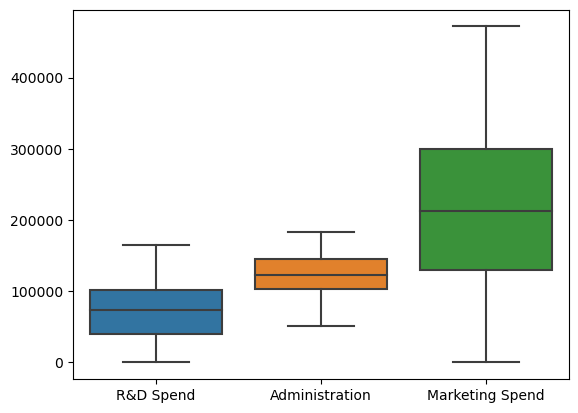

In [44]:
sns.boxplot(data=df.drop('Profit',axis=1))

### Here in above boxplot we can see that there is no outlier in data

# DATA VISUALIZATION

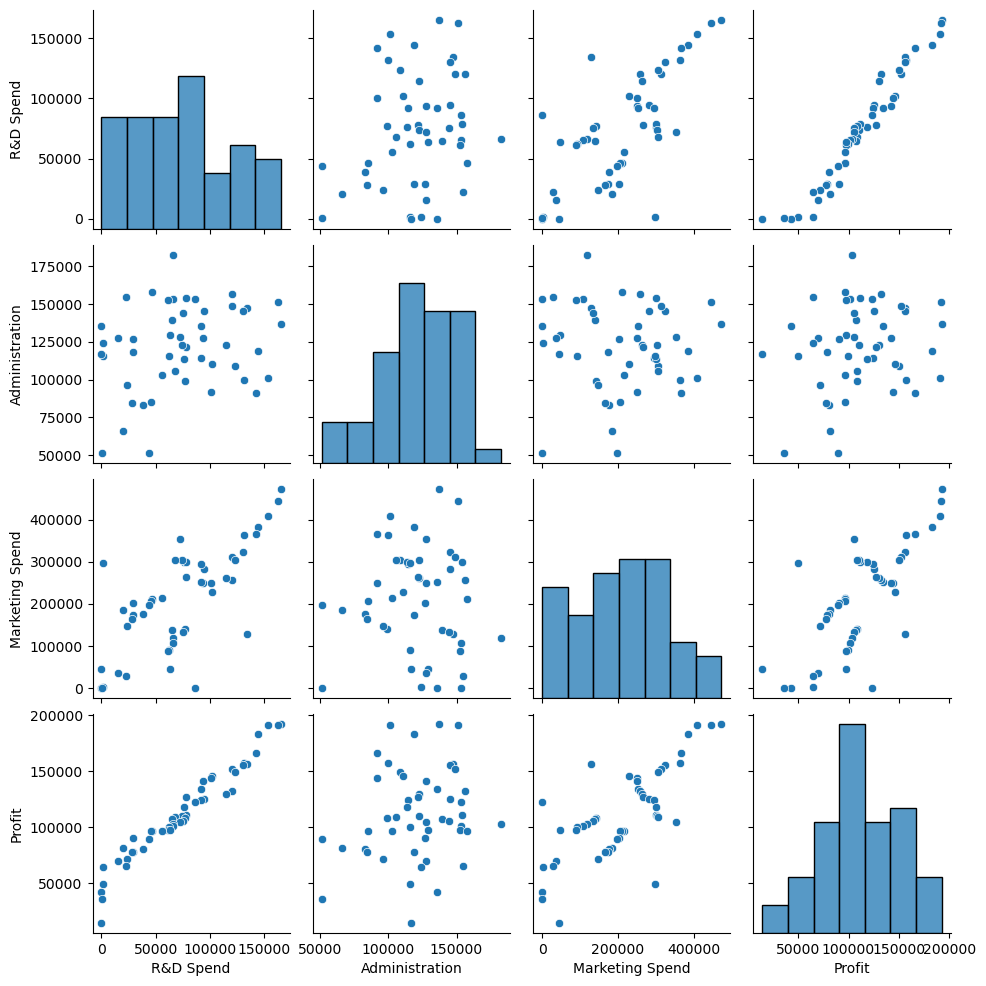

In [45]:
sns.pairplot(df)

In [46]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_9652\61168078.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']].corr(),annot=True)


<Axes: >

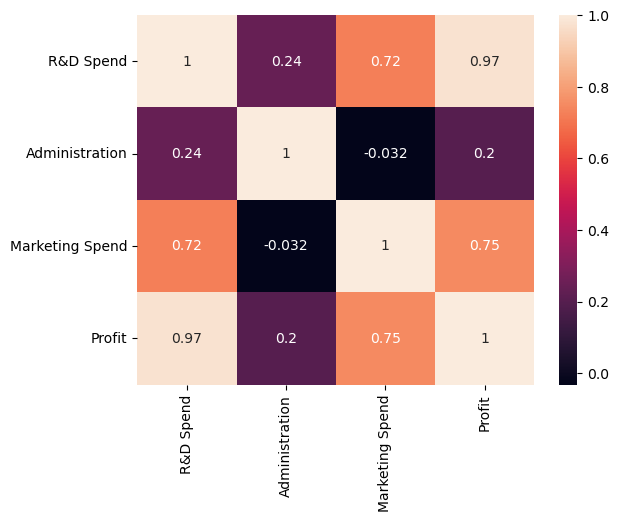

In [47]:
sns.heatmap(df[['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit']].corr(),annot=True)

### Here above,
1) R&D Spend and Profit: There is a weak positive correlation between R&D Spend and Profit.

2) Administration and Profit: There is a very weak positive correlation between Administration and Profit.

3) Marketing Spend and Profit: There is a moderate positive correlation between Marketing Spend and Profit.

4) R&D Spend and Administration: There is a weak negative correlation between R&D Spend and Administration. 

5) Marketing Spend and Administration: There is a weak negative correlation between Marketing Spend and Administration.

6) Marketing Spend and R&D Spend: There is a very weak positive correlation between Marketing Spend and R&D Spend. 

<Axes: xlabel='Profit', ylabel='Marketing Spend'>

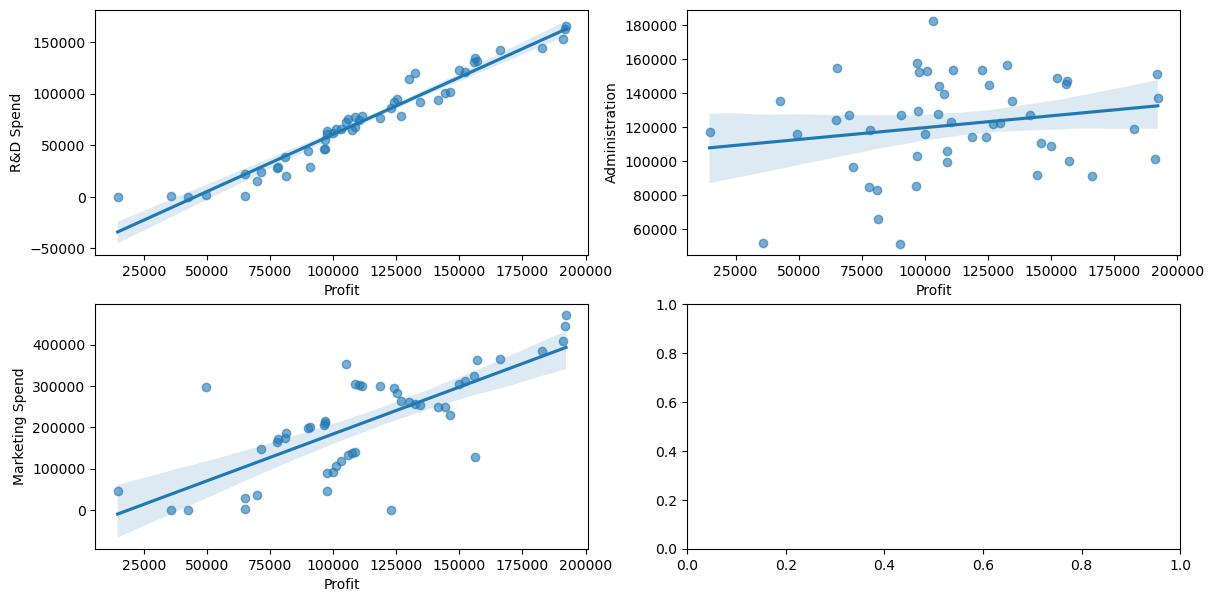

In [48]:
f, axes=plt.subplots(2,2, figsize=(14,7))
sns.regplot(x='Profit', y='R&D Spend',data= df, scatter_kws={'alpha':0.6}, ax=axes[0,0])
sns.regplot(x='Profit', y= 'Administration', data=df, scatter_kws={'alpha':0.6},ax=axes[0,1])
sns.regplot(x='Profit',y= 'Marketing Spend',data=df, scatter_kws={'alpha':0.6},ax=axes[1,0])

# DATA SPLITTING

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
X = df.drop("Profit", axis=1)
y = df["Profit"]

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# DATA ENCODING

In [75]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [76]:
categorical_cols = ["State"]
numeric_cols = ["R&D Spend", "Administration", "Marketing Spend"]

In [77]:
onehot = OneHotEncoder(handle_unknown='ignore')

# FEATURE SCALING

In [78]:
from sklearn.preprocessing import StandardScaler

In [79]:
scaler = StandardScaler()

# CREATING PIPELINE

In [80]:
from sklearn.pipeline import Pipeline

In [81]:
numeric_transformer = Pipeline(steps=[('scaler', scaler)])
categorical_transformer = Pipeline(steps=[('onehot', onehot)])

In [83]:
preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer, numeric_cols),
                                               ('cat', categorical_transformer, categorical_cols)])

# MODEL SELECTION

In [84]:
from sklearn.linear_model import LinearRegression

In [85]:
model = LinearRegression()

In [86]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('model', model)])

In [88]:
model_pipeline.fit(X_train, y_train)

y_pred = model_pipeline.predict(X_test)

# MODEL EVALUATION

In [89]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score

In [90]:
# Lets calculate evaluation metrics

In [91]:
mae=mean_absolute_error(y_test, y_pred)
mse=mean_squared_error(y_test, y_pred)
rmse=mean_squared_error(y_test, y_pred,squared=True)
r2_1=r2_score(y_test, y_pred)



print("Mean absolute Error (MAE):",mae)
print("Mean Squared Error (MSE):",mse)
print("Root Mean Squared Error (rmse):",rmse)
print("R-Squared(r2):",r2_1)

Mean absolute Error (MAE): 6961.47781327556
Mean Squared Error (MSE): 82010363.04501358
Root Mean Squared Error (rmse): 82010363.04501358
R-Squared(r2): 0.8987266414319838


# RIDGE MODEL

In [92]:
from sklearn.linear_model import RidgeCV

In [93]:
ridge_cv_model= RidgeCV (alphas = (0.1, 1.0, 10.0))

In [94]:
model_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                              ('ridge_cv_model',ridge_cv_model)])

In [95]:
model_pipeline.fit(X_train,y_train)
ridge_pred=model_pipeline.predict(X_test)

In [96]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, ridge_pred)
mse = mean_squared_error(y_test, ridge_pred)
rmse = mean_squared_error(y_test, ridge_pred, squared=False)
r2_2 = r2_score(y_test, ridge_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_2)

Mean Absolute Error (MAE): 6981.724257903268
Mean Squared Error (MSE): 82157288.86525187
Root Mean Squared Error (RMSE): 9064.065802124996
R-squared (R2): 0.8985452049558676


In [97]:
ridge_cv_model.coef_

array([37869.30251155, -1806.64110038,  3559.84988359,  -308.68359038,
         595.9757343 ,  -287.29214392])

# LASSO MODEL

In [98]:
from sklearn.linear_model import LassoCV

In [99]:
lasso_cv_model = LassoCV(eps=0.1, n_alphas=100, cv=5)

In [100]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('lasso_cv_model', lasso_cv_model)])

In [101]:
model_pipeline.fit(X_train, y_train)

lasso_pred = model_pipeline.predict(X_test)

In [102]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, lasso_pred)
mse = mean_squared_error(y_test, lasso_pred)
rmse = mean_squared_error(y_test, lasso_pred, squared=False)
r2_3 = r2_score(y_test, lasso_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_3)

Mean Absolute Error (MAE): 6530.419014731971
Mean Squared Error (MSE): 64869042.305967316
Root Mean Squared Error (RMSE): 8054.132002020287
R-squared (R2): 0.9198941994951273


In [103]:
lasso_cv_model.coef_


array([34740.51016879,    -0.        ,  2136.89596361,    -0.        ,
           0.        ,     0.        ])

# ELASTIC NET

In [104]:
from sklearn.linear_model import ElasticNetCV

In [105]:
elastic_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], eps=0.001, n_alphas=100, max_iter=1000000)

In [106]:
model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('elastic_model', elastic_model)])

In [107]:
model_pipeline.fit(X_train, y_train)

elastic_pred = model_pipeline.predict(X_test)

In [108]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, elastic_pred)
mse = mean_squared_error(y_test, elastic_pred)
rmse = mean_squared_error(y_test, elastic_pred, squared=False)
r2_4 = r2_score(y_test, elastic_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R2):", r2_4)

Mean Absolute Error (MAE): 6560.489311444282
Mean Squared Error (MSE): 67518259.71835706
Root Mean Squared Error (RMSE): 8216.949538506187
R-squared (R2): 0.9166227209286647


In [109]:
elastic_model.l1_ratio_

1.0

In [110]:
elastic_model.alpha_

1000.0313421167242

###### Based on these metrics, Lasso Regression appears to be the best-performing model among the ones listed,
###### as it has the lowest MAE, MSE, and RMSE, as well as the highest R-squared value.

# R^2 TABLE

In [111]:
data = {'Model': ['Linear', 'Ridge', 'LASSO', 'Elastic Net'], 'R2 Score': [r2_1, r2_2, r2_3, r2_4]}
df = pd.DataFrame(data)
df

,Model,R2 Score
0,Linear,0.898727
1,Ridge,0.898545
2,LASSO,0.919894
3,Elastic Net,0.916623


###### 1)The model with the highest R² value indicates the best fit for the data.
###### 2)Here R2 Score of LASSO model is higher with 0.9198

# MODEL DEPLOYMENT

In [112]:
# from joblib import dump,load

In [113]:
# dump(lasso_cv_model, 'final_lasso_cv_model.joblib')